<a href="https://colab.research.google.com/github/SahajTC/Augmented-Financial-Intelligence/blob/main/FbProphet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 57.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 17.0 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot, plot_cross_validation_metric
from prophet.diagnostics import cross_validation, performance_metrics
import plotly.graph_objs as go

In [3]:
btc=yf.download(tickers='BTC-USD', start='2020-01-01', end='2022-11-30', interval = '1d')#bitcoin
eth=yf.download(tickers='ETH-USD', start='2020-01-01', end='2022-11-30', interval = '1d')#etherum
bnb=yf.download(tickers='BNB-USD', start='2020-01-01', end='2022-11-30', interval = '1d')#binance

doge=yf.download(tickers='DOGE-USD', start='2020-01-01', end='2022-11-30', interval = '1d')#dogecoin
dot=yf.download(tickers='DOT-USD', start='2020-01-01', end='2022-11-30', interval = '1d')#polkadot
atom=yf.download(tickers='ATOM-USD', start='2020-01-01', end='2022-11-30', interval = '1d')#cosmos

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [7]:
def clean_data_fit_model(data):
 data.reset_index(inplace=True)
 data['Date'] = pd.to_datetime(data['Date'])
 df = data.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
 df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
 df_train = df[df['ds']<='2022-1-30']
 df_test = df[df['ds']>'2022-1-30']
 m = Prophet(interval_width=0.995, n_changepoints=15)
 m.fit(df_train)

 future = m.make_future_dataframe(periods=31)
 # Forecast the future dataframe values
 forecast = m.predict(future)
 # Check the forecasted values and upper/lower bound
 forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
 # Visualize the forecast
 fig = m.plot(forecast)
 ax = fig.gca()
 ax.plot( df_test["ds"], df_test["y"], 'r.')

 print(f'There are {len(m.changepoints)} change points. \nThe change points dates are \n{df.loc[df["ds"].isin(m.changepoints)]}')
 fig = m.plot(forecast)
 a = add_changepoints_to_plot(fig.gca(), m, forecast)

 df_cv = cross_validation(m, initial='500 days', period='60 days', horizon = '30 days', parallel="processes")

 df_p = performance_metrics(df_cv)
 df_p.head()
 return df_p

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp61f3b2uo/1wx0k_6n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp61f3b2uo/l_ymgcby.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87549', 'data', 'file=/tmp/tmp61f3b2uo/1wx0k_6n.json', 'init=/tmp/tmp61f3b2uo/l_ymgcby.json', 'output', 'file=/tmp/tmp61f3b2uo/prophet_modelfqaot0lw/prophet_model-20230112150726.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:07:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:07:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 4 forecasts with cutoffs between 2021-07-04 00:00:00 and 2021-12-31 00:00:00
INFO:prophet:Applying in parallel with <concur

There are 15 change points. 
The change points dates are 
     index         ds             y
40      40 2020-02-10   9856.611328
81      81 2020-03-22   5830.254883
121    121 2020-05-01   8864.766602
162    162 2020-06-11   9321.781250
202    202 2020-07-21   9374.887695
243    243 2020-08-31  11680.820312
283    283 2020-10-10  11296.361328
324    324 2020-11-20  18621.314453
364    364 2020-12-30  28840.953125
405    405 2021-02-09  46481.105469
445    445 2021-03-21  57523.421875
486    486 2021-05-01  57828.050781
526    526 2021-06-10  36702.597656
567    567 2021-07-21  32110.693359
607    607 2021-08-30  47054.984375


DEBUG:cmdstanpy:input tempfile: /tmp/tmp61f3b2uo/sxomlgb2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp61f3b2uo/9xoibgxa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp61f3b2uo/8t_28rb0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:input tempfile: /tmp/tmp61f3b2uo/kkm9ynmc.json
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78762', 'data', 'file=/tmp/tmp61f3b2uo/sxomlgb2.json', 'init=/tmp/tmp61f3b2uo/8t_28rb0.json', 'output', 'file=/tmp/tmp61f3b2uo/prophet_model5fihfcbo/prophet_model-20230112150727.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:07:27 - cmdstanpy - INFO - Chain [1] start processing
DEBUG:cmdstanpy:running CmdStan, num_threads: None
INFO:cmdstanpy:Chain [1] start processing
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60535', 'data',

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,2.132842e+07,4618.270369,4205.633165,0.093371,0.108051,0.094441,0.916667
1,4 days,2.643303e+07,5141.306433,4487.502352,0.100321,0.122348,0.101297,0.750000
2,5 days,3.143904e+07,5607.052960,4522.395437,0.104513,0.122753,0.103903,0.666667
3,6 days,3.462631e+07,5884.412594,4525.378268,0.107328,0.123204,0.104964,0.666667
4,7 days,4.315466e+07,6569.220720,5042.560487,0.120848,0.113267,0.116679,0.750000


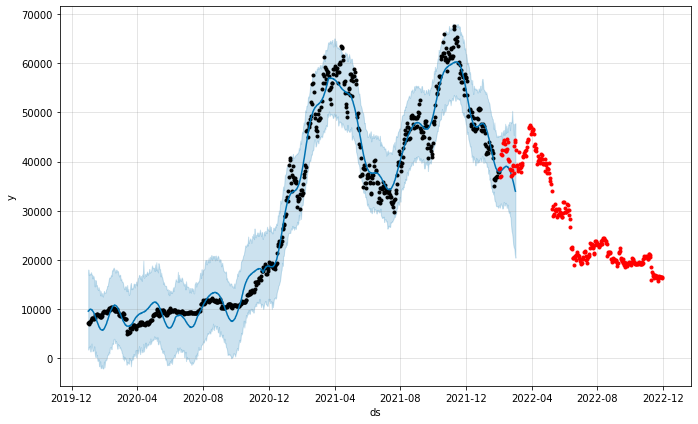

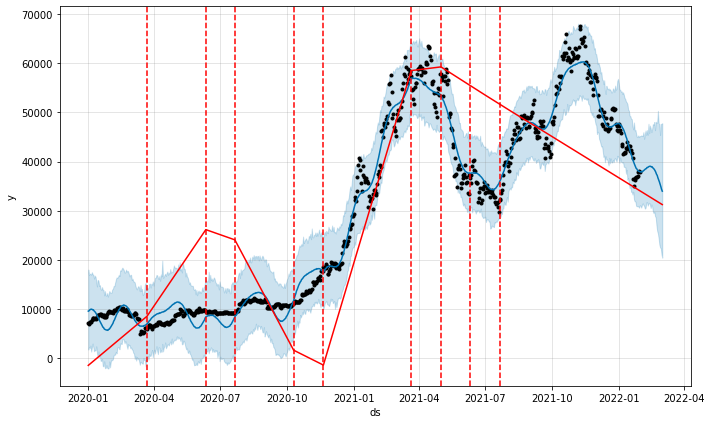

In [8]:
clean_data_fit_model(btc).head()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp61f3b2uo/1ceri6mt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp61f3b2uo/nssztxek.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25227', 'data', 'file=/tmp/tmp61f3b2uo/1ceri6mt.json', 'init=/tmp/tmp61f3b2uo/nssztxek.json', 'output', 'file=/tmp/tmp61f3b2uo/prophet_modelvxhfblhu/prophet_model-20230112150741.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:07:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:07:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 4 forecasts with cutoffs between 2021-07-04 00:00:00 and 2021-12-31 00:00:00
INFO:prophet:Applying in parallel with <concur

There are 15 change points. 
The change points dates are 
     index         ds            y
40      40 2020-02-10   223.522705
81      81 2020-03-22   123.321152
121    121 2020-05-01   214.219101
162    162 2020-06-11   231.702667
202    202 2020-07-21   245.016724
243    243 2020-08-31   435.079742
283    283 2020-10-10   370.967590
324    324 2020-11-20   509.744568
364    364 2020-12-30   751.618958
405    405 2021-02-09  1768.035034
445    445 2021-03-21  1788.217041
486    486 2021-05-01  2945.892822
526    526 2021-06-10  2471.518555
567    567 2021-07-21  1990.970825
607    607 2021-08-30  3224.374268


DEBUG:cmdstanpy:input tempfile: /tmp/tmp61f3b2uo/6wbp5ccv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp61f3b2uo/xap0tuow.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp61f3b2uo/vhi6jsa2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:input tempfile: /tmp/tmp61f3b2uo/0k3wd3rb.json
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75869', 'data', 'file=/tmp/tmp61f3b2uo/6wbp5ccv.json', 'init=/tmp/tmp61f3b2uo/vhi6jsa2.json', 'output', 'file=/tmp/tmp61f3b2uo/prophet_modelk3y06vq9/prophet_model-20230112150743.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:07:43 - cmdstanpy - INFO - Chain [1] start processing
DEBUG:cmdstanpy:idx 0
INFO:cmdstanpy:Chain [1] start processing
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99956', 'data',

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,5.040836e+05,709.988457,635.469708,0.164410,0.163368,0.172012,0.500000
1,4 days,5.186589e+05,720.179742,649.274548,0.170975,0.167431,0.177631,0.416667
2,5 days,5.272844e+05,726.143497,660.969007,0.182033,0.159312,0.183687,0.500000
3,6 days,5.707513e+05,755.480839,693.903122,0.199847,0.167616,0.195612,0.500000
4,7 days,6.930944e+05,832.522886,746.871478,0.220438,0.172465,0.208866,0.500000
5,8 days,8.540518e+05,924.149233,815.659092,0.248180,0.179568,0.229124,0.333333
6,9 days,9.542480e+05,976.856198,855.621959,0.269929,0.182096,0.243595,0.333333
7,10 days,1.025652e+06,1012.744542,888.139799,0.287248,0.212650,0.255953,0.250000
8,11 days,1.026885e+06,1013.353384,900.527430,0.294255,0.235828,0.262006,0.250000
9,12 days,1.025805e+06,1012.820077,914.765977,0.297820,0.239996,0.266798,0.083333


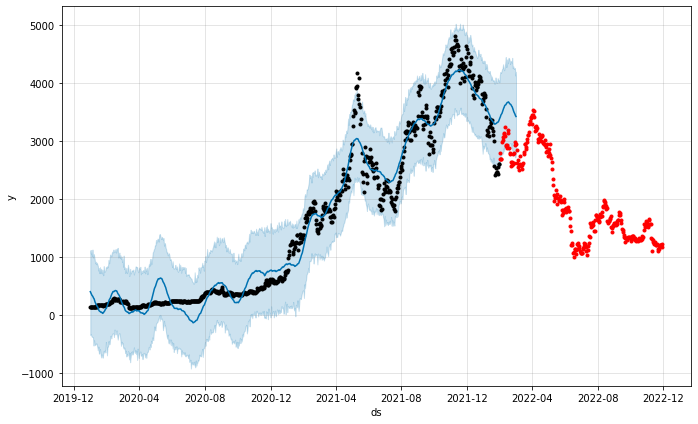

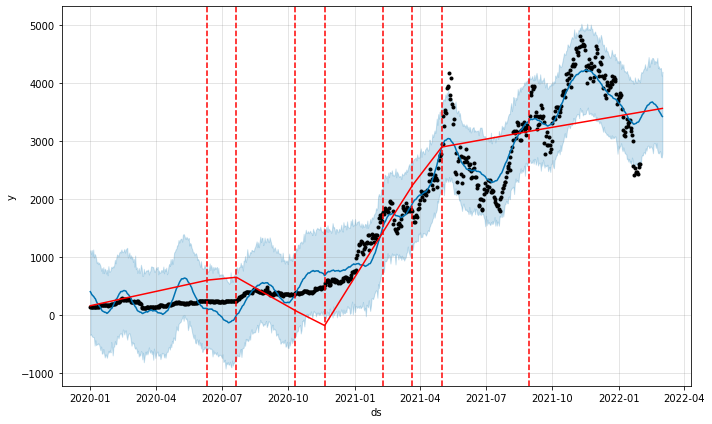

In [9]:
clean_data_fit_model(eth)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp61f3b2uo/uv0tcxhn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp61f3b2uo/b7a_5ovo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46415', 'data', 'file=/tmp/tmp61f3b2uo/uv0tcxhn.json', 'init=/tmp/tmp61f3b2uo/b7a_5ovo.json', 'output', 'file=/tmp/tmp61f3b2uo/prophet_model2w8f7i5p/prophet_model-20230112150746.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:07:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:07:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 4 forecasts with cutoffs between 2021-07-04 00:00:00 and 2021-12-31 00:00:00
INFO:prophet:Applying in parallel with <concur

There are 15 change points. 
The change points dates are 
            ds           y
40  2020-02-10   25.218315
81  2020-03-22   11.158228
121 2020-05-01   17.564993
162 2020-06-11   16.308926
202 2020-07-21   17.715408
243 2020-08-31   23.193050
283 2020-10-10   28.312487
324 2020-11-20   28.891996
364 2020-12-30   38.136299
405 2021-02-09  107.899277
445 2021-03-21  264.886169
486 2021-05-01  619.347229
526 2021-06-10  352.183197
567 2021-07-21  292.531372
607 2021-08-30  459.490753


DEBUG:cmdstanpy:input tempfile: /tmp/tmp61f3b2uo/37pb2mcd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp61f3b2uo/u6adgvuf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp61f3b2uo/z_sfw29m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp61f3b2uo/jep9kb1m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97266', 'data', 'file=/tmp/tmp61f3b2uo/u6adgvuf.json', 'init=/tmp/tmp61f3b2uo/z_sfw29m.json', 'output', 'file=/tmp/tmp61f3b2uo/prophet_model6izphokd/prophet_model-20230112150747.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG:cmdstanpy:running CmdStan, num_threads: None
15:07:47 - cmdstanpy - INFO - Chain [1] start processing
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8381', 'data', 'file=/tmp/tmp61f3b2uo/37pb2mcd.json', 'in

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,6982.989603,83.564284,70.844012,0.138401,0.150586,0.149936,0.833333
1,4 days,8908.548430,94.385107,79.537179,0.151861,0.164688,0.165686,0.666667
2,5 days,10575.156376,102.835579,86.032185,0.164114,0.164688,0.176402,0.666667
3,6 days,12565.882387,112.097647,92.384064,0.175000,0.189131,0.186305,0.583333
4,7 days,14424.350896,120.101419,97.120694,0.185162,0.200296,0.193388,0.583333
5,8 days,15888.176354,126.048310,102.790713,0.201013,0.206542,0.206212,0.500000
6,9 days,16220.355326,127.359159,106.330102,0.215537,0.220997,0.217224,0.500000
7,10 days,16783.563092,129.551392,110.180422,0.229817,0.235595,0.228735,0.500000
8,11 days,16239.051729,127.432538,109.398624,0.227124,0.235595,0.227966,0.500000
9,12 days,16905.836897,130.022448,111.906907,0.227393,0.234319,0.232620,0.500000


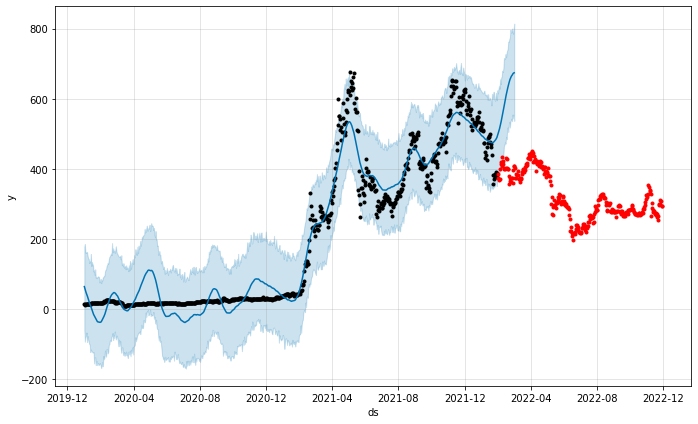

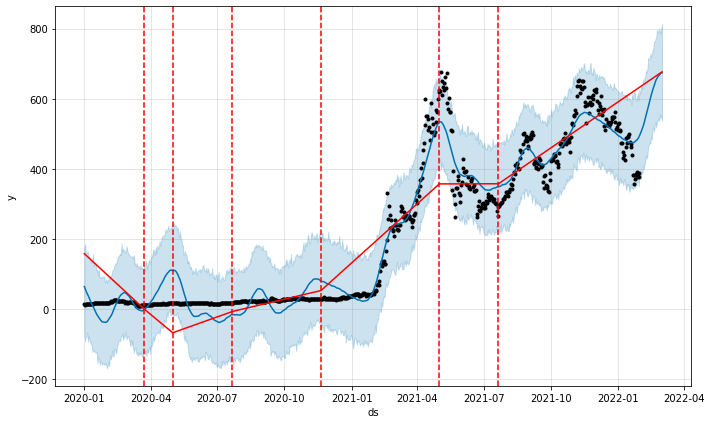

In [10]:
clean_data_fit_model(bnb)